Lasso Regression (L1 Regularization)

Definition:
Lasso regression is a type of linear regression that adds a penalty on the absolute value of the coefficients to reduce overfitting.

👉 It can shrink some coefficients to exactly zero, which means it performs feature selection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
X, y = make_regression(
    n_samples=500,
    n_features=10,
    n_informative=5,
    noise=15,
    random_state=42
)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [5]:
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(262.30776655312474, 0.9428029703899435)

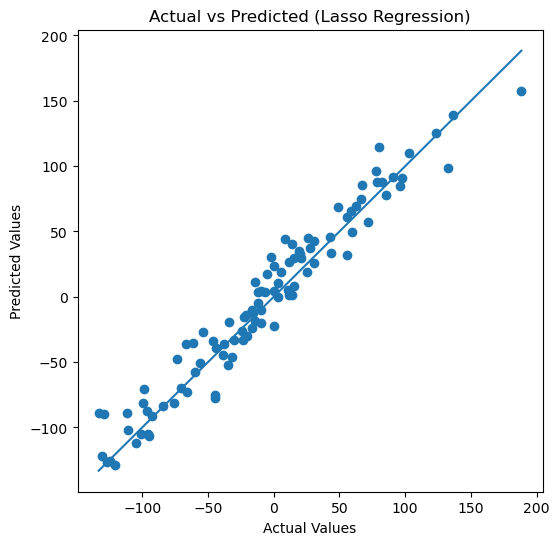

In [6]:
y_pred = lasso.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Lasso Regression)")
plt.show()

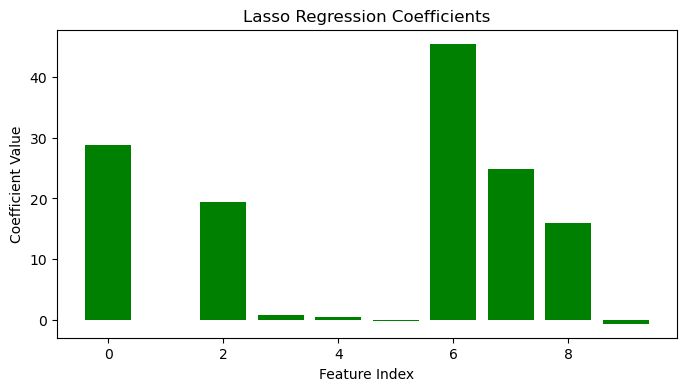

In [7]:
plt.figure(figsize=(8, 4))
plt.bar(range(len(lasso.coef_)), lasso.coef_, color="green")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Coefficients")
plt.show()

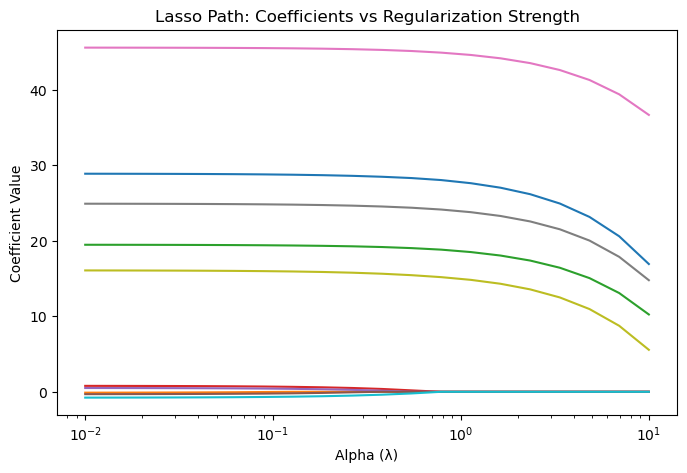

In [8]:
alphas = np.logspace(-2, 1, 20)
coefficients = []

for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_train, y_train)
    coefficients.append(model.coef_)

coefficients = np.array(coefficients)

plt.figure(figsize=(8, 5))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i])
plt.xscale("log")
plt.xlabel("Alpha (λ)")
plt.ylabel("Coefficient Value")
plt.title("Lasso Path: Coefficients vs Regularization Strength")
plt.show()